In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from gradient_aware_harmonisation.harmonise import harmonise

## Toy Example 1: Artificial data
### Create some data

In [2]:
# create some data
t0 = 3.0

x1 = np.arange(-2, 4., 0.01)
y1 = -16*x1

x2 = np.arange(2, 10, 0.01)
y2 = 0.5*x2 + x2**3

### Harmonise functions using `harmonise`

In [3]:
res = harmonise([x1, x2], [y1, y2], t0=t0)

### Plot results

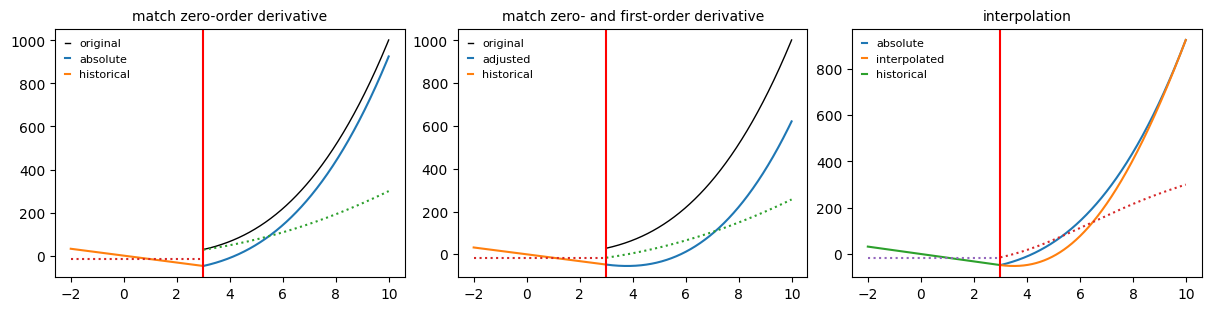

In [4]:
_, axs = plt.subplots(1,3, constrained_layout=True, figsize=(12, 3))

[axs[i].plot(res["x2"], res["f2"], color="black", lw=1., label="original") for i in range(2)]
axs[1].plot(res["x2"], res["f2_adj"], label="adjusted")
[axs[i].plot(res["x2"], res["f2_abs"], label="absolute") for i in [0,2]]
axs[2].plot(res["x2"], res["f2_intpol"], label="interpolated")
[axs[i].plot(res["x1"], res["f1"], label="historical") for i in range(3)]
axs[1].plot(res["x2"], res["df2_adj"], linestyle="dotted")
axs[0].plot(res["x2"], res["df2_abs"], linestyle="dotted")
axs[2].plot(res["x2"], res["df2_intpol"], linestyle="dotted")
[axs[i].plot(res["x1"], res["df1"], linestyle="dotted") for i in range(3)]
[axs[i].axvline(3.0, color="red") for i in range(3)]
axs[1].set_title("match zero- and first-order derivative", fontsize="medium")
axs[0].set_title("match zero-order derivative", fontsize="medium")
axs[2].set_title("interpolation", fontsize="medium")
[axs[i].legend(fontsize=8, handlelength=0.5, frameon=False) for i in range(3)]
plt.show()

## Toy Example 2: Use real timeseries data
### Read data from file

In [5]:
# read data from file
df = pd.read_csv("../../tests/test-data/monthly_co2_surface-flask.csv")
df2 = pd.read_csv("../../tests/test-data/monthly_co2_airs_nlis.csv")

# get aggregated CO2 value per year
dat0 = df[["year", "value"]].groupby(["year"]).agg({"value":"mean"}).reset_index()
dat1 = df2[["year", "value"]].groupby(["year"]).agg({"value":"mean"}).reset_index()

# select specific time sequence
dat0_short = dat0[(dat0["year"]<=2003) & (dat0["year"]>2000)]

### Preprocess data and run `harmonise`

In [6]:
# prepare data for input to harmonise
x=(list(dat0_short["year"]), list(dat1["year"]))
y=(list(dat0_short["value"]), list(dat1["value"]))
# select harmonization time point
t0=2003

# harmonise timeseries at t0
res0 = harmonise(x=x, y=y, t0=t0, bc_type="natural")
# harmonise timeseries at t0 and assure convergence at t1 (converge_t)
res = harmonise(x=x, y=y, t0=t0, t_converge=2007, bc_type="natural")

### Plot results

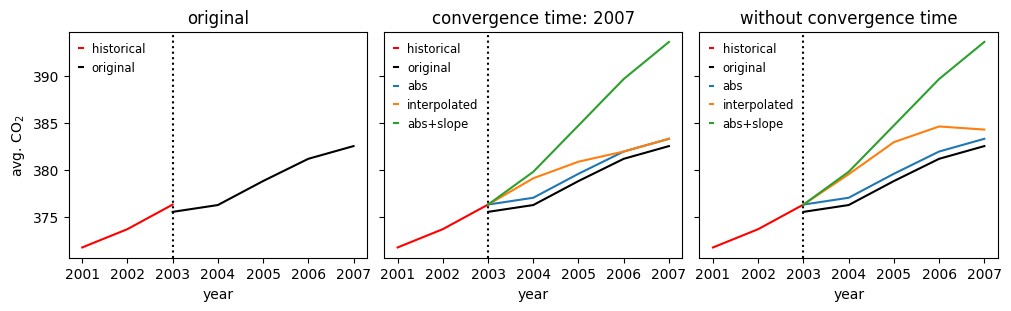

In [8]:
_, axs = plt.subplots(1,3, constrained_layout=True, sharey=True, figsize=(10, 3))

[axs[i].plot(dat0_short["year"], dat0_short["value"], label="historical", color="red") for i in range(3)]
[axs[i].plot(dat1["year"], dat1["value"], label="original", color="black") for i in range(3)]
[axs[i].axvline(t0, color="black", linestyle="dotted") for i in range(3)]
axs[1].plot(res["x2"], res["f2_abs"], label="abs")
axs[1].plot(res["x2"], res["f2_intpol"], label="interpolated")
axs[1].plot(res["x2"], res["f2_adj"], label="abs+slope")
axs[2].plot(res0["x2"], res0["f2_abs"], label="abs")
axs[2].plot(res0["x2"], res0["f2_intpol"], label="interpolated")
axs[2].plot(res0["x2"], res0["f2_adj"], label="abs+slope")
axs[0].set_title("original")
axs[0].set_ylabel(r"avg. $CO_2$")
[axs[i].set_xlabel("year") for i in range(3)]
axs[2].set_title("without convergence time")
axs[1].set_title("convergence time: 2007")
[axs[i].legend(handlelength=0.3, fontsize="small", frameon=False, loc="upper left") for i in range(3)]
plt.show()

### Plot final result using interpolation method (against orig. data)

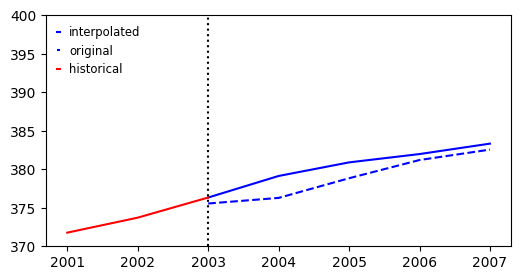

In [10]:
plt.figure(figsize=(6,3))
plt.plot(res["x2"], res["f2_intpol"], label="interpolated", color="blue")
plt.plot(res["x2"], res["f2"], label="original", linestyle="dashed", color="blue")
plt.plot(dat0_short["year"], dat0_short["value"], label="historical", color="red")
plt.axvline(t0, color="black", linestyle="dotted")
plt.ylim(370, 400)
plt.legend(handlelength=0.3, fontsize="small", frameon=False, loc="upper left")
plt.show()